In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#Air passengers 데이터 로드
data = pd.read_csv('./data/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


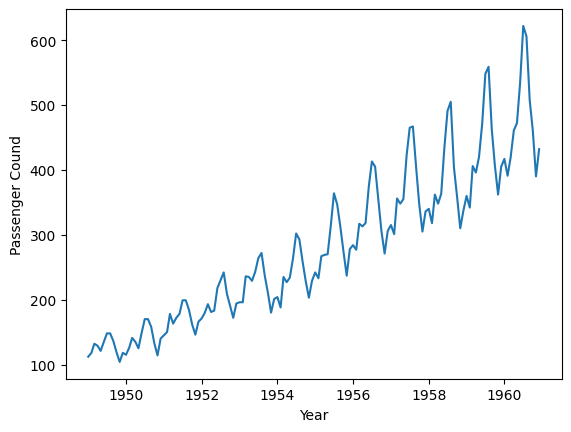

In [4]:
#데이터 시각화
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger Cound')
plt.show()

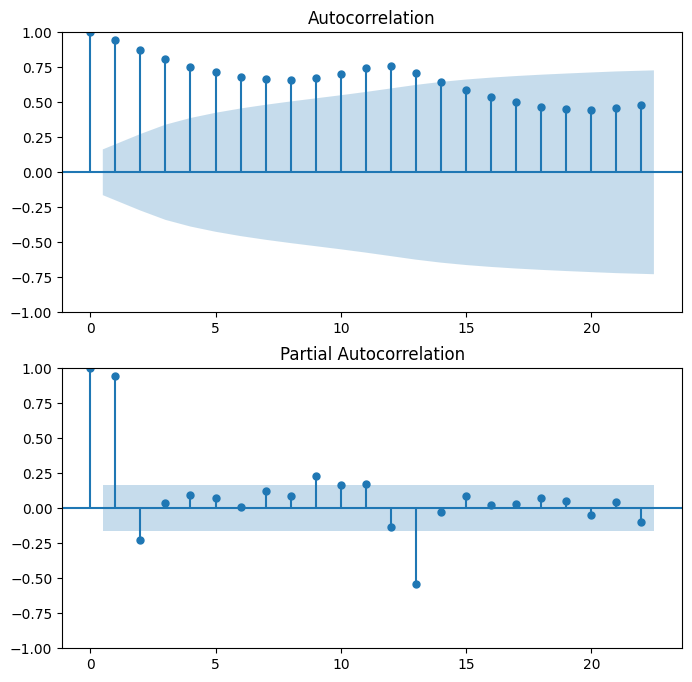

In [6]:
#자기상관 함수 (ACF) 및 부분 자기상관 함수(PACF) 그래프
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)
plt.show()

In [7]:
#ADF 검정
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:' , result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: 0.8153688792060441
p-value: 0.9918802434376409
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [9]:
# ARIMA 모델 적합
model = ARIMA(data, order=(2,1,2))
results = model.fit()

#모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Thu, 01 Jun 2023   AIC                           1353.347
Time:                        10:30:54   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.792      0.0

C:\ProgramData\miniconda3\envs\AI\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\miniconda3\envs\AI\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\miniconda3\envs\AI\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\miniconda3\envs\AI\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1950-01-01    121.157087
1950-02-01    120.594891
1950-03-01    132.839970
1950-04-01    146.351130
1950-05-01    137.425575
                 ...    
1961-08-01    539.727094
1961-09-01    508.526738
1961-10-01    478.147109
1961-11-01    456.748439
1961-12-01    449.699139
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

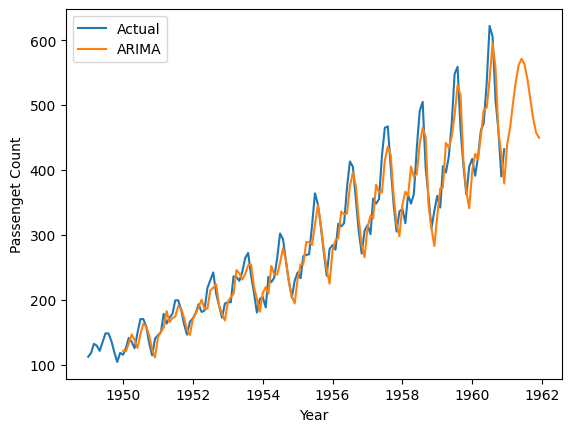

In [10]:
pred = results.predict(start='1950-01-01', end='1961-12-01')
print(pred)
plt.plot(data, label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenget Count')
plt.legend()
plt.show